# Task

Steepest Ascent/Descent Hill Climbing Algorithm

Your task is to run the Steepest Descent/Ascent Hill Climbing algorithm for the Travelling Salesman Problem on the supplied data. Run the algorithm 10 times and report back the results. One way to report back the results is to present the convergence of the cost function. Moreover, you can also compare your results with the results obtained using the Simple Hill Climbing algorithm. The data file is in a CSV format and can be downloaded here.

Step 1: Initial Solution: You can construct your own initial solution (based on either the random or greedy approach).

Step 2: Neighbourhood operator: Do a swap of two adjacent cities. You are also encouraged to experiment with other neighbourhood operators.

Step 3: Solution evaluation: Add the cost of travelling through the cities.

Step 4: Termination Condition: No improvement seen in 100 consecutive iterations (feel free to play around with this parameter by increasing or decreasing the number of iterations).

In [15]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("TSP Matrix.csv", header=None)

In [11]:
df.columns = ['x', 'y']

In [12]:
df.head()

,x,y
0,2.7933,3.6940
1,2.6067,4.4254
2,2.8600,5.0373
3,2.5400,6.2463
4,3.1267,6.4701


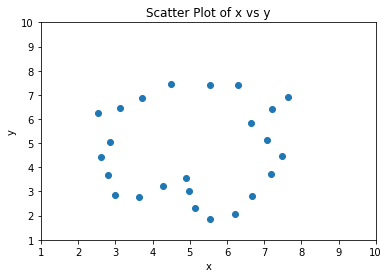

In [14]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(1, 10)
plt.ylim(1, 10)
plt.title('Scatter Plot of x vs y')
plt.show()

In [30]:
# To calculate the distance between each city
def calculate_distance_matrix(df):
    num_cities = len(df)
    distance_matrix = np.zeros((num_cities, num_cities))

    for i in range(num_cities):
        for j in range(num_cities):
            x1, y1 = df.iloc[i]
            x2, y2 = df.iloc[j]
            distance_matrix[i, j] = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    return distance_matrix

# To run the class to make a matrix
distance_matrix = calculate_distance_matrix(df)

# To display the matrix.
distance_matrix_df = pd.DataFrame(distance_matrix)
distance_matrix_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.754828,1.344955,2.564838,2.796048,3.327688,4.111249,4.641222,5.098828,5.815422,...,4.386726,3.988462,3.787718,3.295457,2.722923,2.279243,2.098710,1.550642,1.260858,0.873894
1,0.754828,0.000000,0.662256,1.822121,2.109786,2.705419,3.553030,4.205051,4.739405,5.610638,...,4.629071,4.381416,4.311853,3.888250,3.294177,2.753187,2.444147,2.050227,1.961756,1.628650
2,1.344955,0.662256,0.000000,1.250632,1.457410,2.043680,2.901820,3.599568,4.170696,5.130404,...,4.519600,4.418469,4.484554,4.146633,3.543632,2.925453,2.516956,2.293262,2.410979,2.198046
3,2.564838,1.822121,1.250632,0.000000,0.627936,1.349135,2.283698,3.235777,3.931699,5.137388,...,5.288430,5.373747,5.570921,5.303289,4.703334,4.047060,3.578422,3.477723,3.659721,3.433058
4,2.796048,2.109786,1.457410,0.627936,0.000000,0.731248,1.670595,2.607870,3.305480,4.528793,...,4.904377,5.092699,5.385559,5.191958,4.604296,3.921122,3.413939,3.435770,3.750770,3.629253


# 1. Sttepest Ascent Hill Climbing with adjacent swapping

In [21]:
# Redefine the steepest ascent hill climbing algorithm

def steepest_ascent_hill_climbing(distance_matrix, max_no_improvement=100):
    """Steepest Ascent Hill Climbing for TSP."""
    def calculate_cost(solution, distance_matrix):
        """Calculate the total cost (distance) for the given solution."""
        total_cost = 0
        for i in range(len(solution) - 1):
            total_cost += distance_matrix[solution[i], solution[i + 1]]
        total_cost += distance_matrix[solution[-1], solution[0]]  # Return to the start city
        return total_cost
    
    def generate_neighbour(solution, i):
        """Generate a new solution by swapping two adjacent cities at index i and i+1."""
        new_solution = solution[:]
        if i < len(new_solution) - 1:
            new_solution[i], new_solution[i + 1] = new_solution[i + 1], new_solution[i]
        return new_solution
    
    # A: Random initial solution
    s = list(range(len(distance_matrix)))
    random.shuffle(s)
    current_cost = calculate_cost(s, distance_matrix)

    cost_history = [current_cost]  # To track cost over iterations

    no_improvement_count = 0
    
    while no_improvement_count < max_no_improvement:
        # B-D: Explore the neighborhood by swapping i and i+1 for all cities
        best_neighbour = None
        best_neighbour_cost = float('inf')

        for i in range(len(s) - 1):  # D: Swap adjacent cities for each i
            candidate_solution = generate_neighbour(s, i)
            candidate_cost = calculate_cost(candidate_solution, distance_matrix)

            # E: Select the best candidate solution (lowest cost)
            if candidate_cost < best_neighbour_cost:
                best_neighbour = candidate_solution
                best_neighbour_cost = candidate_cost

        # F: Compare the best neighbour with the current solution
        if best_neighbour_cost < current_cost:
            s = best_neighbour
            current_cost = best_neighbour_cost
            no_improvement_count = 0  # Reset if improvement is found
        else:
            no_improvement_count += 1  # Increment if no improvement

        # Store the cost for plotting
        cost_history.append(current_cost)

    return s, current_cost, cost_history

        


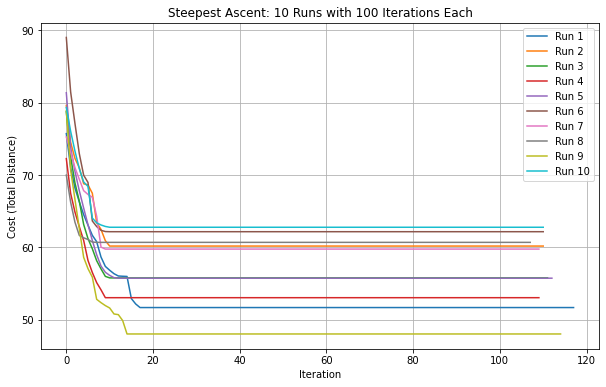

([0,
  4,
  7,
  10,
  13,
  20,
  22,
  14,
  15,
  16,
  18,
  1,
  2,
  3,
  5,
  6,
  21,
  19,
  17,
  12,
  9,
  8,
  11,
  23],
 48.005174679998)

In [36]:
def plot_steepest_ascent_runs(distance_matrix, num_runs=10, max_iterations=100):
    """Run the steepest ascent hill climbing algorithm multiple times and plot the cost history."""
    plt.figure(figsize=(10, 6))
    
    best_solution = None
    best_cost = float('inf')
    
    for run in range(num_runs):
        solution, cost, cost_history = steepest_ascent_hill_climbing(distance_matrix, max_iterations)
        iterations = list(range(len(cost_history)))
        plt.plot(iterations, cost_history, label=f'Run {run + 1}')
        
        # Track the best solution
        if cost < best_cost:
            best_solution = solution
            best_cost = cost
    
    plt.xlabel('Iteration')
    plt.ylabel('Cost (Total Distance)')
    plt.title(f'Steepest Ascent: {num_runs} Runs with {max_iterations} Iterations Each')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # Output the best solution and best cost
    return best_solution, best_cost

# Run the algorithm 10 times and plot the results
best_solution, best_cost = plot_steepest_ascent_runs(distance_matrix, num_runs=10, max_iterations=100)

# Output the best solution and cost
best_solution, best_cost

# 2. Steepest Ascent Hill Climbing Algorithm with Inversion Operator

In [43]:
# Modified steepest ascent hill climbing algorithm with Inversion Operator

def steepest_ascent_hill_climbing_with_inversion(distance_matrix, max_no_improvement=100):
    """Steepest Ascent Hill Climbing for TSP with Inversion Operator."""
    
    def calculate_cost(solution, distance_matrix):
        """Calculate the total cost (distance) for the given solution."""
        total_cost = 0
        for i in range(len(solution) - 1):
            total_cost += distance_matrix[solution[i], solution[i + 1]]
        total_cost += distance_matrix[solution[-1], solution[0]]  # Return to the start city
        return total_cost
    
    def inversion_operator(solution):
        """Perform the inversion operator on a given solution."""
        # Step 1: Randomly select two positions i and j (where i < j) from the solution
        i, j = sorted(random.sample(range(len(solution)), 2))
        
        # Step 2: Reverse the order of cities between the positions i and j
        new_solution = solution[:i] + solution[i:j+1][::-1] + solution[j+1:]
        
        # Step 3: Return the new solution
        return new_solution
    
    # A: Random initial solution
    s = list(range(len(distance_matrix)))
    random.shuffle(s)
    current_cost = calculate_cost(s, distance_matrix)

    cost_history = [current_cost]  # To track cost over iterations

    no_improvement_count = 0
    
    while no_improvement_count < max_no_improvement:
        # B-D: Explore the neighborhood using Inversion Operator
        best_neighbour = None
        best_neighbour_cost = float('inf')

        # Try a certain number of inversion operations
        for _ in range(len(s) - 1):  # Perform inversions across the solution
            candidate_solution = inversion_operator(s)
            candidate_cost = calculate_cost(candidate_solution, distance_matrix)

            # E: Select the best candidate solution (lowest cost)
            if candidate_cost < best_neighbour_cost:
                best_neighbour = candidate_solution
                best_neighbour_cost = candidate_cost

        # F: Compare the best neighbour with the current solution
        if best_neighbour_cost < current_cost:
            s = best_neighbour
            current_cost = best_neighbour_cost
            no_improvement_count = 0  # Reset if improvement is found
        else:
            no_improvement_count += 1  # Increment if no improvement

        # Store the cost for plotting
        cost_history.append(current_cost)

    return s, current_cost, cost_history



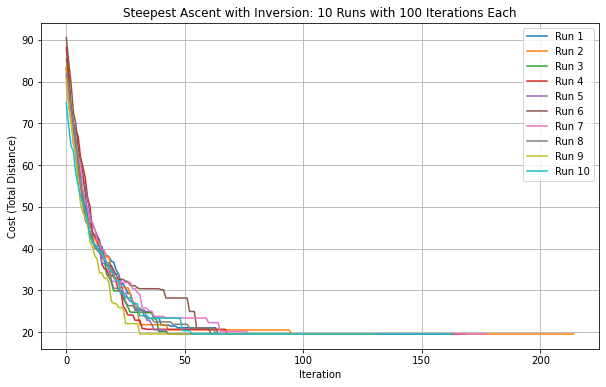

([20,
  19,
  18,
  17,
  16,
  15,
  14,
  13,
  12,
  11,
  10,
  9,
  8,
  7,
  6,
  5,
  4,
  3,
  2,
  1,
  0,
  23,
  22,
  21],
 19.55501292737809)

In [42]:
def plot_steepest_ascent_with_inversion_runs(distance_matrix, num_runs=10, max_iterations=100):
    """Run the steepest ascent hill climbing algorithm with inversion operator multiple times and plot the cost history."""
    plt.figure(figsize=(10, 6))
    
    best_solution = None
    best_cost = float('inf')
    
    for run in range(num_runs):
        solution, cost, cost_history = steepest_ascent_hill_climbing_with_inversion(distance_matrix, max_iterations)
        iterations = list(range(len(cost_history)))
        plt.plot(iterations, cost_history, label=f'Run {run + 1}')
        
        # Track the best solution
        if cost < best_cost:
            best_solution = solution
            best_cost = cost
    
    plt.xlabel('Iteration')
    plt.ylabel('Cost (Total Distance)')
    plt.title(f'Steepest Ascent with Inversion: {num_runs} Runs with {max_iterations} Iterations Each')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return best_solution, best_cost

# Run the algorithm 10 times, plotting the cost history for each run
best_solution, best_cost = plot_steepest_ascent_with_inversion_runs(distance_matrix, num_runs=10, max_iterations=100)

# Output the best solution and its cost
best_solution, best_cost

# 3. Steepest Hill Climbing with 2-opt operator.